# Illustrations of the Distribution class

These examples show the use of the Distribution class. In particular:
- How to define and use one of the univariate distributions supported by UQpy,
- How to define a custom distribution,
- How to define a multivariate distribution by 1) giving a list of independent marginals or 2) giving a list of marginals and a copula to model the dependence structure.

Import the necessary modules. Note that the user only needs to make use of the Distribution class of the Distributions module.

FIXME: we use other classes nonetheless; maybe redundant

In [709]:
import numpy as np
import matplotlib.pyplot as plt
# FIXME: import here?

## Univariate distribution

### Constructing the distribution

FIXME: keep add these types of subheadings to mcs notebook?

We'll be using UQpy's lognormal distribution class.

In [710]:
from UQpy.distributions import Lognormal

We construct a lognormal distribution `dist` with shape parameter 1, location parameter 0, and scale parameter $e^5$. These parameters can be accessed after construction via `dist.parameters`.

FIXME: what do these parameters mean?

s: "shape"
loc: center
scale: variance

In [711]:
dist = Lognormal(s=1, loc=0, scale=np.exp(5))

dist.parameters

{'s': 1, 'loc': 0, 'scale': 148.4131591025766}

### Plotting the PDF

To get points along the PDF and log PDF of `dist`, we'll use the functions `dist.pdf` and `dist.log_pdf`. We can provide an input vector `x` as an `ndarray` of shape `(nsamples, 1)` or `(nsamples,)`. The results of `pdf` and `log_pdf` will be 1D arrays of shape `(nsamples,)`.

In [712]:
x = np.linspace(0.01, 1000, 1000).reshape(-1, 1)

f'shape of x: {x.shape}; shape of dist.pdf(x): {dist.pdf(x).shape}'

'shape of x: (1000, 1); shape of dist.pdf(x): (1000,)'

This in mind, we can plot the PDF and log PDF by supplying our plot function input and output values like `x` and `dist.pdf(x)` or `dist.log_pdf(x)`.

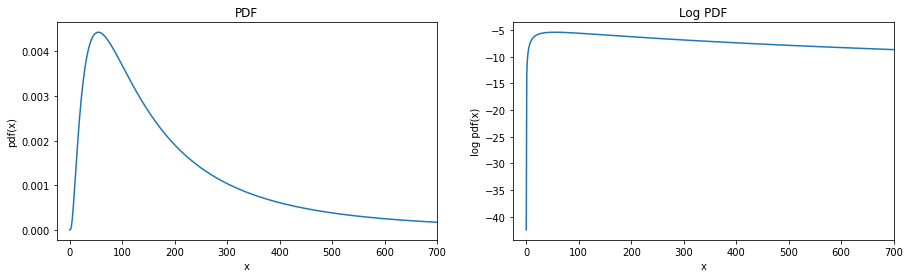

In [713]:
def plot():
    x = np.linspace(0.01, 700, 700).reshape((-1, 1))
    fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

    for axes, plot, label in zip(ax,
                                 [dist.pdf, dist.log_pdf],
                                 ['PDF', 'Log PDF']):
        axes.plot(x, plot(x))
        axes.set_xlabel('x')
        axes.set_ylabel(label.lower() + '(x)')
        axes.set_title(label)
        axes.set_xlim(-25, 700)
        
    fig
        
plot()

### Modifying parameters of the distribution

We've seen that we can view the parameters we supplied `dist`'s constructor after the fact; to update those parameters and modify the distribution accordingly, we can use `dist`'s `update_params` method.

Since construction, `dist`'s location parameter has been 0.

FIXME: why ? say that our distribution plots change accordingly

In [714]:
dist.parameters

{'s': 1, 'loc': 0, 'scale': 148.4131591025766}

Now, we'll change the location of the distribution from 0 to 100.

In [715]:
dist.update_parameters(loc=100)

dist.parameters

{'s': 1, 'loc': 100, 'scale': 148.4131591025766}

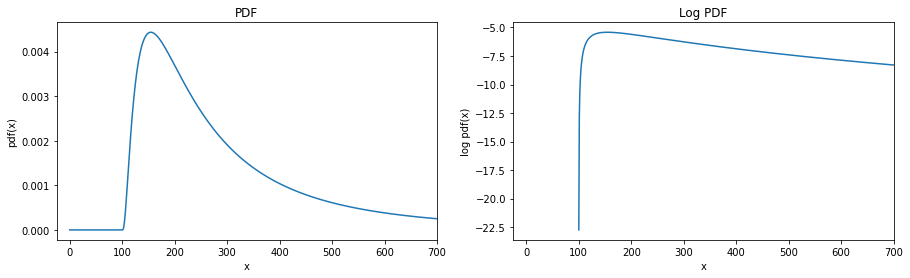

In [716]:
plot()

### Using the moments of the distribution

The `moments` method of a distributon like `dist` returns a vector of the distribution's moments in the following order:

1. Mean
2. Variance
3. Skewness
4. Kurtosis

FIXME: explain parameters & how this order is related, maybe how we can control that

In [717]:
dist.moments()

(array(344.69193226),
 array(102880.64970381),
 array(6.18487714),
 array(110.93639218))

We can reinterpret this vector of moments accordingly.

In [718]:
{name: float(value)
 for name, value
 in zip(['mean', 'variance', 'skewness', 'kurtosis'], dist.moments())}


{'mean': 344.6919322642204,
 'variance': 102880.64970380608,
 'skewness': 6.184877138632554,
 'kurtosis': 110.9363921763115}

### Generate 10,000 random samples from the lognormal distribution.

The number of samples is provided as `nsamples` (default 1). The user can fix the seed of the pseudo random generator via input random_state.

Important: the output of rvs is a (nsamples, 1) ndarray.

Shape of output provided by rvs is (nsamples, dimension), i.e. here:
(10000, 1)


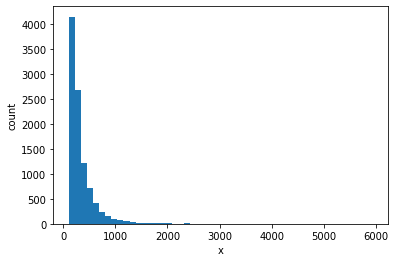

In [719]:
y1 = dist.rvs(nsamples=10000) # TODO: document methods even if same as scipy? link to scipy docs?
# say we use rvs like in scipy

print('Shape of output provided by rvs is (nsamples, dimension), i.e. here:')
print(y1.shape)
plt.hist(y1[:, 0], bins=50)
plt.xlabel('x')
plt.ylabel('count')
plt.show()

### Example of a uniform distribution

TODO: plot quickly each one

In [720]:
from UQpy.distributions import Uniform
print(Uniform.__bases__)
d1 = Uniform(loc=1., scale=2.)
print(d1.parameters)
print(d1.cdf(x=[0., 1., 2., 3.]))
print(d1.rvs(nsamples=2, random_state=123))
d1.update_parameters(loc=0.)
print(d1.parameters)

(<class 'UQpy.distributions.baseclass.DistributionContinuous1D.DistributionContinuous1D'>,)
{'loc': 1.0, 'scale': 2.0}
[0.  0.  0.5 1. ]
[[2.39293837]
 [1.57227867]]
{'loc': 0.0, 'scale': 2.0}


### Normal distribution and the use of fit method. 

Parameters to be learnt should be instantiated as None:

In [721]:
from UQpy.distributions import Normal
print(Normal(loc=None, scale=None).fit(data=[-4, 2, 2, 1]))
print(Normal(loc=0., scale=None).fit(data=[-4, 2, 2, 1]))

{'loc': 0.25, 'scale': 2.48746859276655}
{'loc': 0.0, 'scale': 2.5}


### Example of a 1D discrete distribution

In [722]:
from UQpy.distributions import Binomial
print(Binomial.__bases__)
dist = Binomial(n=5, p=0.4) # FIXME: use unique names; not `dist` again
print(dist.rvs(nsamples=3, random_state=123))

(<class 'UQpy.distributions.baseclass.DistributionDiscrete1D.DistributionDiscrete1D'>,)
[[3]
 [1]
 [1]]


## Multivariate distributions

TODO: plot if easy enough

"see the prev"

split off

### Supported multivariate normal

In [723]:
from UQpy.distributions import MultivariateNormal
print(MultivariateNormal.__bases__) # show the base classes of the `MultivariateNormal` class
dist = MultivariateNormal(mean=[1., 2.], cov=[[4., -0.2], [-0.2, 1.]]) # FIXME unique
print(dist.rvs(nsamples=5, random_state=123))

(<class 'UQpy.distributions.baseclass.DistributionND.DistributionND'>,)
[[ 3.23569787  2.84449354]
 [ 0.33525582  0.54456529]
 [ 2.26521608  3.56007209]
 [ 5.82251567  1.25292155]
 [-1.58752203  1.30887881]]


### Example of a multivariate distribution provided with independent marginals

Create a bivariate distribution as a product of two independent univariate distributions: a normal and a lognormal. Then draw some random samples (left plot below) and plot the pdf (right contour plot).

In [724]:
from UQpy.distributions import Normal, JointIndependent
marginals = [Normal(loc=2., scale=2.),
             Lognormal(s=1., loc=0., scale=np.exp(5))]

dist = JointIndependent(marginals=marginals) # FIXME: unique
print(dist.get_parameters())
print(dist.rvs(nsamples=3, random_state=123))

{'loc_0': 2.0, 'scale_0': 2.0, 's_1': 1.0, 'loc_1': 0.0, 'scale_1': 148.4131591025766}
[[-1.71261207e-01  5.01174573e+01]
 [ 3.99469089e+00  4.02359290e+02]
 [ 2.56595700e+00  1.96955635e+02]]


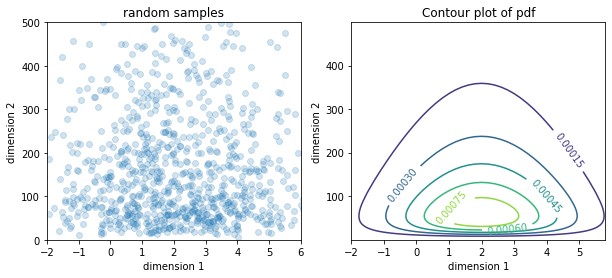

In [725]:
data = dist.rvs(nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].scatter(data[:, 0], data[:, 1], alpha=0.2)
ax[0].set_xlabel('dimension 1')
ax[0].set_ylabel('dimension 2')
ax[0].set_title('random samples')
ax[0].set_ylim([0, 500])
ax[0].set_xlim([-2, 6])

x = np.arange(-2.0, 6.0, 0.2) # axis ranges/spaces
y = np.arange(0.01, 500, 1)

X, Y = np.meshgrid(x, y) # excel thing

Z = dist.pdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1)) # squish point pairs single-file and get z for all
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_xlabel('dimension 1')
ax[1].set_ylabel('dimension 2')
ax[1].set_title('Contour plot of pdf')
ax[0].set_ylim([0, 500])
ax[0].set_xlim([-2, 6])
plt.show()

# TODO: brevity please (and make it work); refer to originals in repo

In [726]:
# Compute moments:
# TODO: expand on little comments like this

print(dist.moments())
print(dist.moments(moments2return='mv'))

(array([  2.        , 244.69193226]), array([4.0000000e+00, 1.0288065e+05]), array([0.        , 6.18487714]), array([  0.        , 110.93639218]))
(array([  2.        , 244.69193226]), array([4.0000000e+00, 1.0288065e+05]))


The update_params method behave differently here:

FIXME: `update_params` → `update_parameters`

In [727]:
print(dist)
print()
print('Parameters of the marginals:')
print([m.parameters for m in marginals])
print('Parameters of the joint:')
print(dist.get_parameters())
print()
print('Update the location parameter of the second marginal and scale parameter of first marginal...')
dist.update_parameters(loc_1=1, scale_0=3, )
print('Parameters of the marginals:')
print([m.parameters for m in marginals])
print('Parameters of the joint:')
print(dist.get_parameters())

# FIXME: print?????? no


Parameters of the marginals:
[{'loc': 2.0, 'scale': 2.0}, {'s': 1.0, 'loc': 0.0, 'scale': 148.4131591025766}]
Parameters of the joint:
{'loc_0': 2.0, 'scale_0': 2.0, 's_1': 1.0, 'loc_1': 0.0, 'scale_1': 148.4131591025766}

Update the location parameter of the second marginal and scale parameter of first marginal...
Parameters of the marginals:
[{'loc': 2.0, 'scale': 3}, {'s': 1.0, 'loc': 1, 'scale': 148.4131591025766}]
Parameters of the joint:
{'loc_0': 2.0, 'scale_0': 3, 's_1': 1.0, 'loc_1': 1, 'scale_1': 148.4131591025766}


Run the mle method. Note that the scale of the first marginal and loc of the second marginals are assumed known here.

FIXME: mle → maximum likelihood evaluation; refer to scipy

In [728]:
d = JointIndependent(marginals=[Normal(loc=None, scale=2.), Lognormal(s=None, loc=0., scale=None)])
print(data.shape)
ml_estimate = d.fit(data=data)
print('ML estimate:')
print(ml_estimate)
print('True parameters used to generate the data:')
print("{'loc_0': 2.0, 'scale_0': 2.0, 's_1': 1.0, 'loc_1': 0.0, 'scale_1': 148.4131591025766}")

# TODO: split up big chunks of output and explain parts individually

(1000, 2)
ML estimate:
{'loc_0': 2.073528662208105, 'scale_0': 2.0, 's_1': 1.0132602375080322, 'loc_1': 0.0, 'scale_1': 153.06580463751573}
True parameters used to generate the data:
{'loc_0': 2.0, 'scale_0': 2.0, 's_1': 1.0, 'loc_1': 0.0, 'scale_1': 148.4131591025766}


## Example of a multivariate distribution provided with marginals and copula

In [730]:
from UQpy.distributions import Gumbel, JointCopula
marginals = [Normal(loc=0., scale=1),
             Normal(loc=0., scale=1)]
copula = Gumbel(theta=3.)

In [ ]:
# dist_1 is a multivariate normal with independent marginals
dist_1 = JointIndependent(marginals)
print('Does the distribution with independent margianls have an rvs method?')
print(hasattr(dist_1, 'rvs'))

# dist_2 exhibits dependence between the two dimensions, defined using a gumbel copula
dist_2 = JointCopula(marginals=marginals, copula=copula)
print('Does the distribution with copula have an rvs method?')
print(hasattr(dist_2, 'rvs'))

Does the distribution with independent margianls have an rvs method?
True
Does the distribution with copula have an rvs method?
False


In [ ]:
print(dist_2.copula.parameters)
dist_2.update_parameters(theta_c=2)
print(dist_2.copula.parameters)

{'theta': 3.0}
{'theta': 2.0}


Compare pdfs for dist_1 and dist_2.

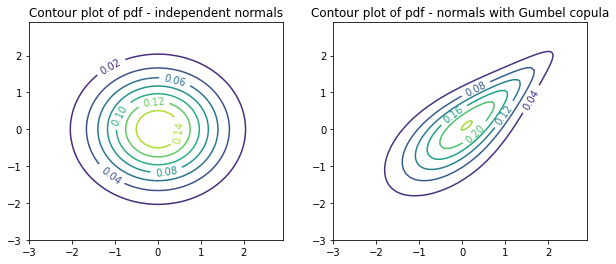

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.pdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax[0].contour(X, Y, Z.reshape(X.shape))
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].set_title('Contour plot of pdf - independent normals')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_2.pdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf - normals with Gumbel copula')
plt.show()

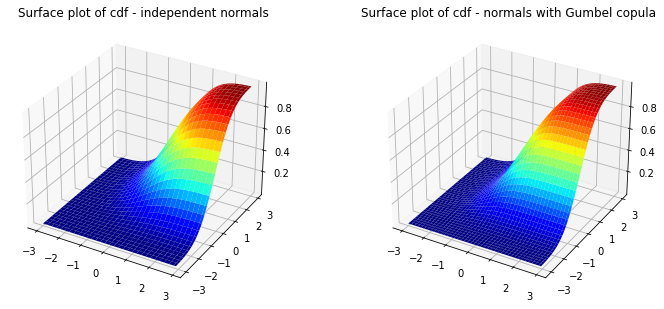

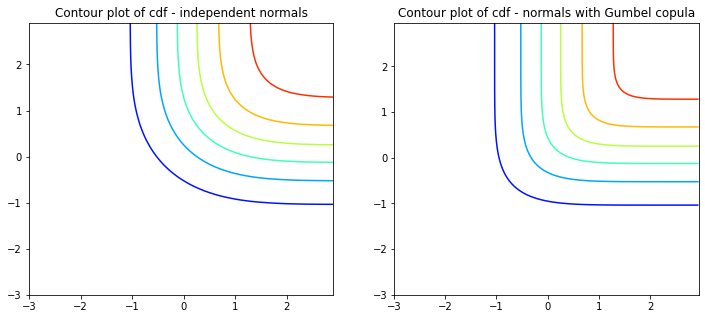

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # do we need this?

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121, projection='3d')
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - independent normals')

ax = fig.add_subplot(122, projection='3d')
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - normals with Gumbel copula')
plt.show()

# contour plots
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
# ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - independent normals')

ax = fig.add_subplot(122)
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
# ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - normals with Gumbel copula')
plt.show()

## Example with a custom distribution

split

Build a custom distribution which inherits from DistributionND. It inherits method update_params. All other methods must be defined by the user as follows.

In [ ]:
from UQpy.distributions import DistributionND

class Rosenbrock(DistributionND):
    def __init__(self, p=20):
        super().__init__(p=p)

    def pdf(self, x):
        return np.exp(-(100 * (x[:, 1] - x[:, 0] ** 2) ** 2 + (1 - x[:, 0]) ** 2) / self.parameters['p'])

    def log_pdf(self, x):
        return -(100 * (x[:, 1] - x[:, 0] ** 2) ** 2 + (1 - x[:, 0]) ** 2) / self.parameters['p']

In [ ]:
dist = Rosenbrock(p=20)
print(dist.parameters)
dist.update_parameters(p=40)
print(dist.parameters)

# separate construction & augmentation

{'p': 20}
{'p': 40}


{'p': 20}


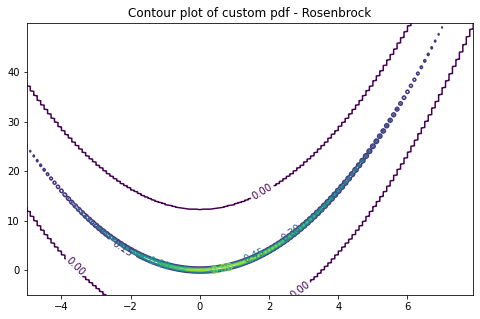

In [ ]:
dist = Rosenbrock(p=20)
print(dist.parameters)

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(-5, 8, 0.1)
y = np.arange(-5, 50, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x=np.concatenate([X.reshape((-1, 1)), Y.reshape((-1, 1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot of custom pdf - Rosenbrock')
plt.show()

In [ ]:
print('Does the rosenbrock distribution have an rvs method?')
print(hasattr(dist, 'rvs'))

print('Does the rosenbrock distribution have an pdf method?')
print(hasattr(dist, 'pdf'))

print('Does the rosenbrock distribution have an update_params method?')
print(hasattr(dist, 'update_params')) # FIXME

# we ask these questions because not all custom distributions have a sampling method, etc; custom distributions don't necesssarily behave just like in scipy unless implemented so

Does the rosenbrock distribution have an rvs method?
False
Does the rosenbrock distribution have an pdf method?
True
Does the rosenbrock distribution have an update_params method?
False
